In [1]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female
df = pd.read_csv ("All5_Top50sCpG_Female.csv")
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female
(150, 230)


,PATNO,APPRDX,cg11668199,cg04983473,cg25943702,cg01620849,cg22210403,cg21241862,cg19030090,cg02232418,...,cg14548871,cg04721557,cg17218282,cg20471798,cg04948892,cg12751142,cg17957325,cg13520090,cg05538980,cg18580385
0,3002,1,0.045694,0.924158,0.908038,0.033501,0.07147,0.904030,0.917645,0.830685,...,0.027095,0.939462,0.767832,0.845091,0.156538,0.510861,0.922070,0.877443,0.792984,0.895246
1,3003,1,0.050506,0.929821,0.928079,0.032749,0.06974,0.914086,0.889673,0.768925,...,0.018183,0.939685,0.778352,0.820209,0.150134,0.622603,0.929889,0.778461,0.763160,0.887588


In [3]:
df_data = df.drop(['PATNO','APPRDX'], axis=1)
print(df_data.shape)
df_data.head(2)

(150, 228)


,cg11668199,cg04983473,cg25943702,cg01620849,cg22210403,cg21241862,cg19030090,cg02232418,cg18757169,cg02992048,...,cg14548871,cg04721557,cg17218282,cg20471798,cg04948892,cg12751142,cg17957325,cg13520090,cg05538980,cg18580385
0,0.045694,0.924158,0.908038,0.033501,0.07147,0.904030,0.917645,0.830685,0.506640,0.879891,...,0.027095,0.939462,0.767832,0.845091,0.156538,0.510861,0.922070,0.877443,0.792984,0.895246
1,0.050506,0.929821,0.928079,0.032749,0.06974,0.914086,0.889673,0.768925,0.535331,0.878317,...,0.018183,0.939685,0.778352,0.820209,0.150134,0.622603,0.929889,0.778461,0.763160,0.887588


In [4]:
df_data = (df_data-0.5)/0.5
df_data.head(2)

,cg11668199,cg04983473,cg25943702,cg01620849,cg22210403,cg21241862,cg19030090,cg02232418,cg18757169,cg02992048,...,cg14548871,cg04721557,cg17218282,cg20471798,cg04948892,cg12751142,cg17957325,cg13520090,cg05538980,cg18580385
0,-0.908613,0.848316,0.816077,-0.932999,-0.857060,0.808061,0.835289,0.661369,0.013280,0.759782,...,-0.945811,0.878924,0.535665,0.690181,-0.686924,0.021722,0.844140,0.754885,0.585967,0.790493
1,-0.898988,0.859643,0.856158,-0.934501,-0.860521,0.828171,0.779345,0.537849,0.070662,0.756635,...,-0.963633,0.879370,0.556704,0.640418,-0.699731,0.245206,0.859779,0.556923,0.526319,0.775177


In [5]:
df_data = pd.DataFrame(df_data)

In [6]:
def update_cell_value(cell_value):
    if cell_value < -0.9:
        return cell_value
    elif cell_value > 0.9:
        return cell_value
    else:
        return 0

# apply function to each cell of the dataframe
df_data = df_data.applymap(update_cell_value)
df_data.head(2)


,cg11668199,cg04983473,cg25943702,cg01620849,cg22210403,cg21241862,cg19030090,cg02232418,cg18757169,cg02992048,...,cg14548871,cg04721557,cg17218282,cg20471798,cg04948892,cg12751142,cg17957325,cg13520090,cg05538980,cg18580385
0,-0.908613,0.0,0,-0.932999,0.0,0,0,0,0,0,...,-0.945811,0.0,0,0,0,0,0.0,0,0,0
1,0.000000,0.0,0,-0.934501,0.0,0,0,0,0,0,...,-0.963633,0.0,0,0,0,0,0.0,0,0,0


In [7]:
df_targets = df[['APPRDX']]

In [8]:
colors = {1:"#F1746B", 2: "#36C3D1"}

In [9]:
clusterable_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2,random_state=42,).fit_transform(df_data)

In [10]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#F1746B', markersize=30, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#36C3D1', markersize=30, color='floralwhite')]

C:\Users\system 4\AppData\Local\Temp\ipykernel_9384\3063067133.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],


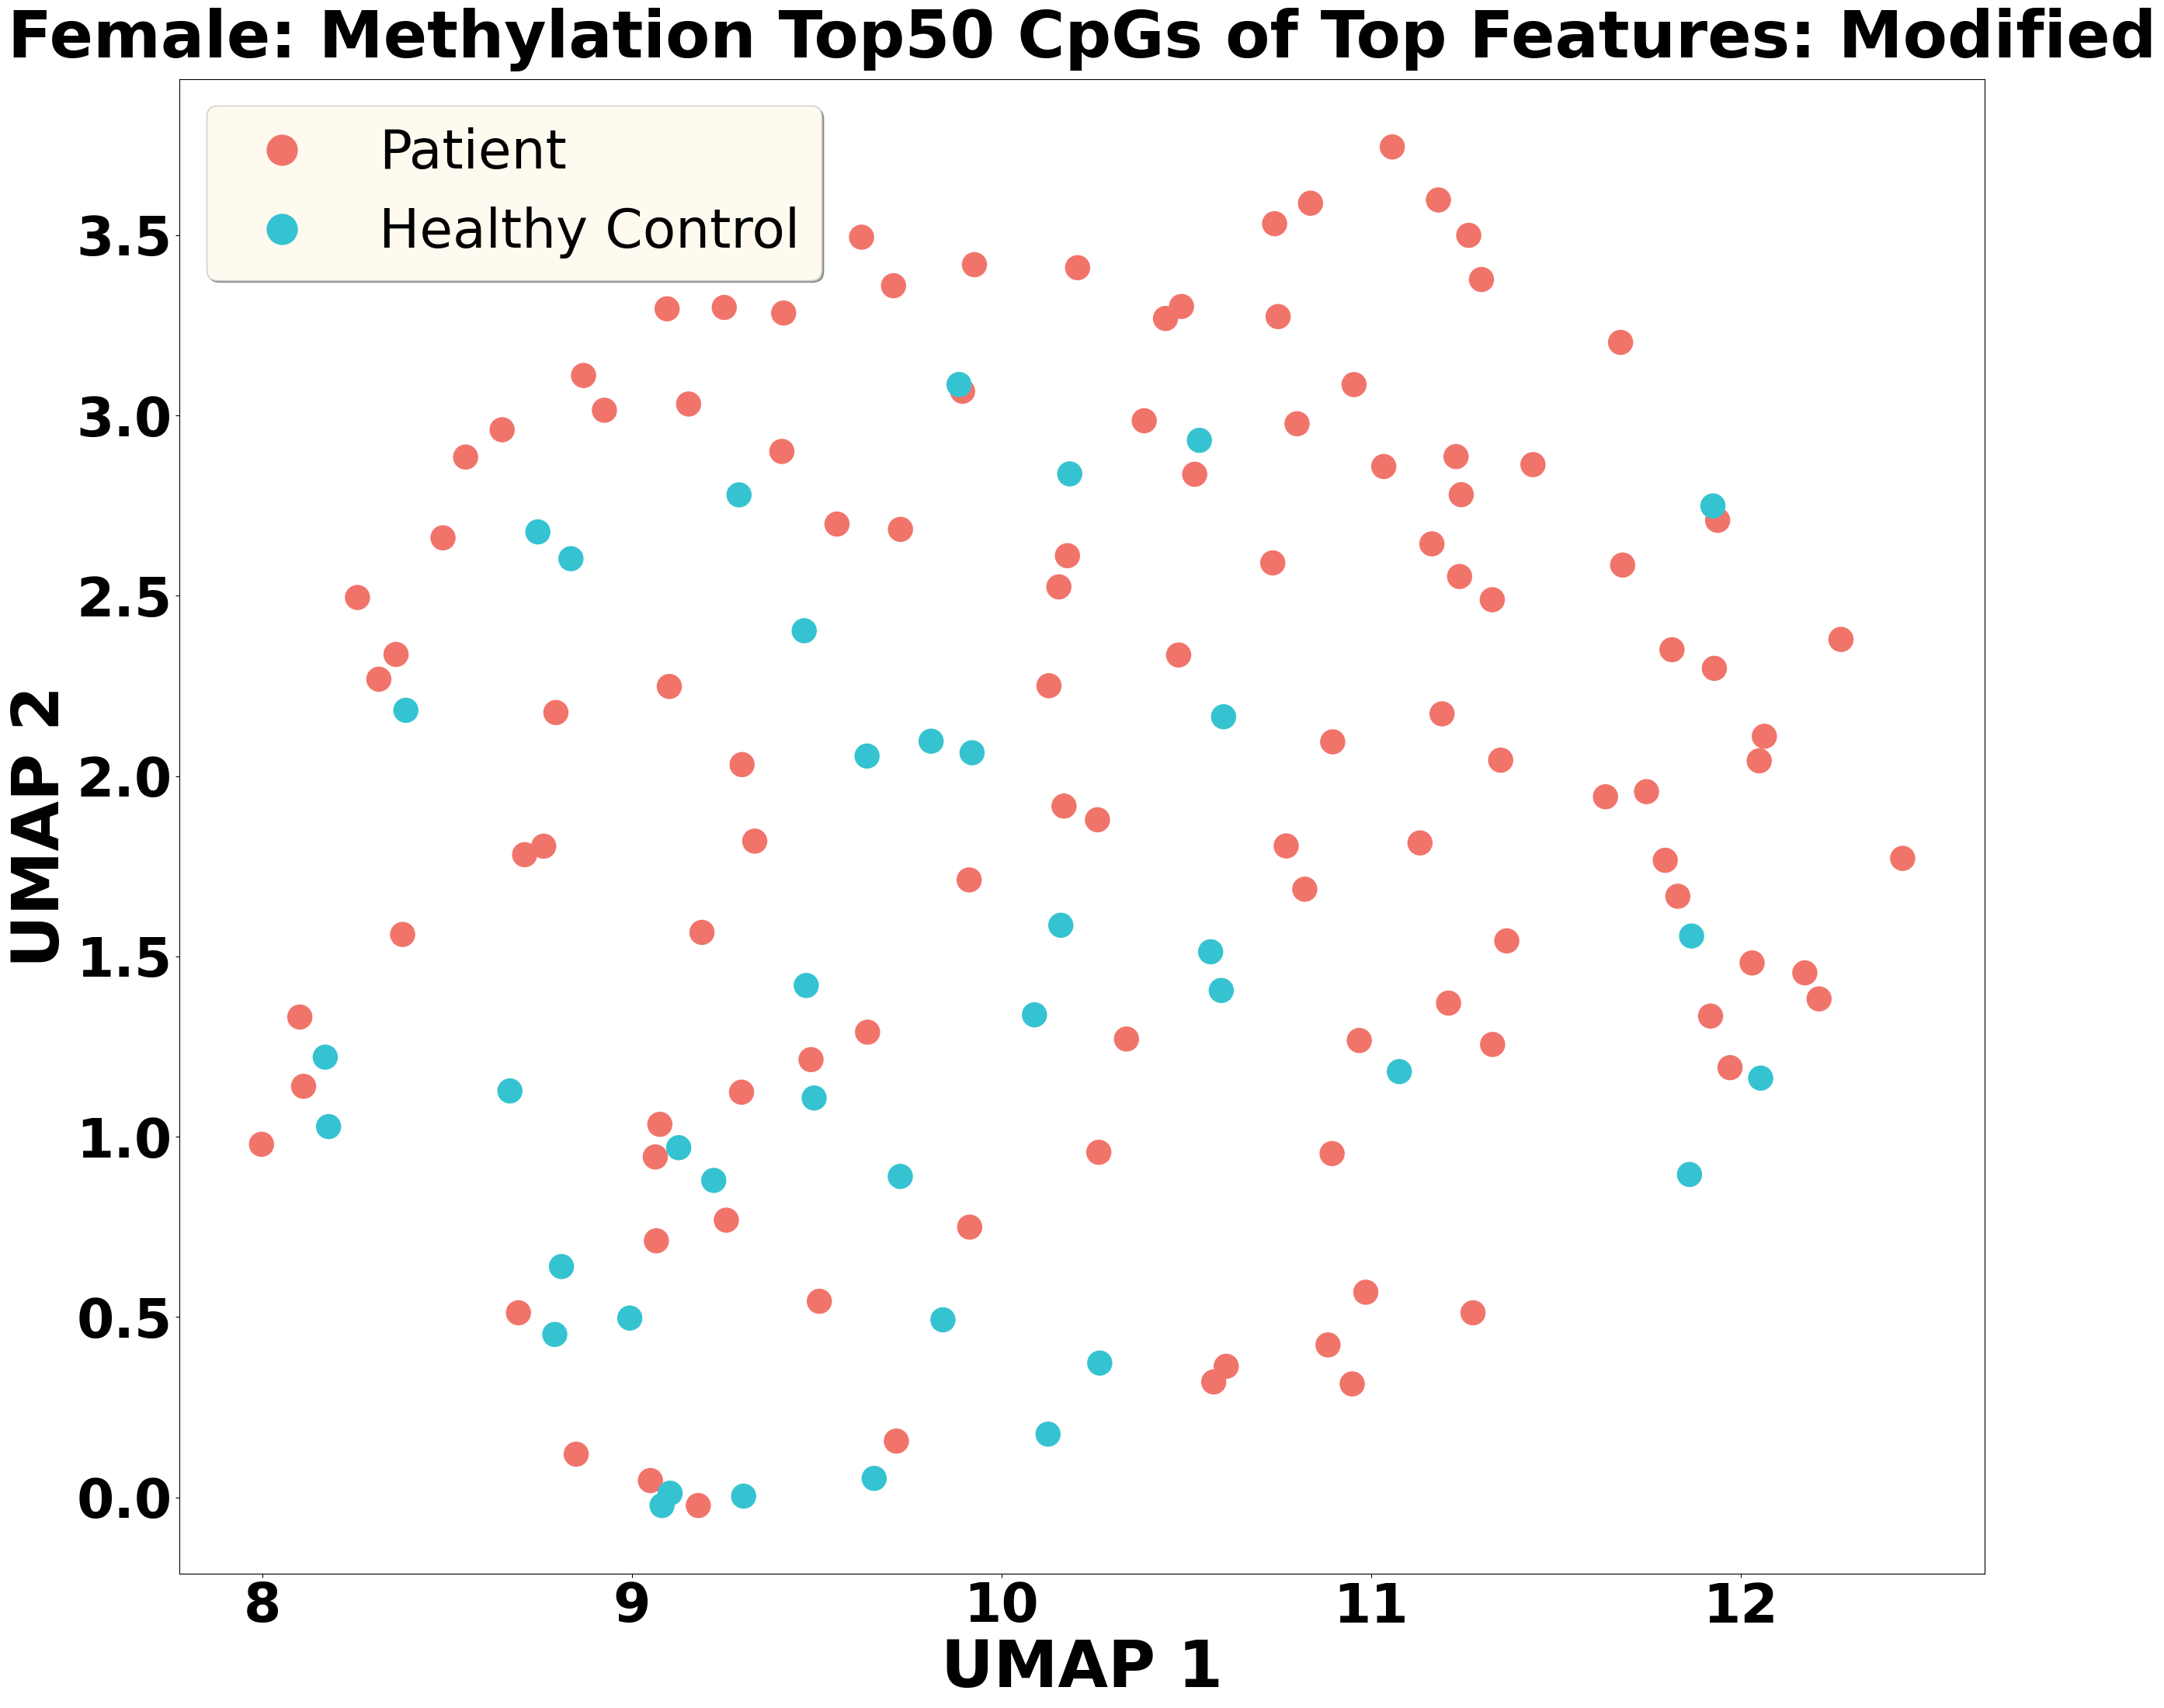

In [16]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['APPRDX'].map(colors), s=500, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.title(label= "Female: Methylation Top50 CpGs of Top Features: Modified", fontsize=60, fontweight='bold',
          color='black', pad= 20)
plt.xlabel('UMAP 1', fontsize=60, fontweight='bold', color='black')
plt.ylabel('UMAP 2', fontsize=60, fontweight='bold', color='black')
plt.xticks(fontsize=50, fontweight='bold', color='black')
plt.yticks(fontsize=50, fontweight='bold', color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 50})
plt.savefig("UMAP_CpG_PvsH_05_95_TopFeats_Modified_Female.pdf", format="pdf")
plt.savefig("UMAP_CpG_PvsH_05_95_TopFeats_Modified_Female.svg", format="svg")
plt.show()